# Polynomial Regression

$\hat{y} = w_o+w_1 \cdot x+w_2 \cdot x^2 +\ ...\, +w_d \cdot x^d $  

## Data Import

In [21]:
import pandas as pd 

cars = pd.read_csv('/Users/WoodPecker/PycharmProjects/JupyterProject/auto-mpg.data.txt', header=None, sep='\s+')

## Extract relevant data

In [22]:
import numpy as np
y = cars.iloc[:,0].values 
x = cars.iloc[:,[3]].values
x = x.reshape(x.size, 1)

## Fit regression model

In [23]:
from sklearn import linear_model, preprocessing

# precompute polynomial features
poly = preprocessing.PolynomialFeatures(2)
Xp = poly.fit_transform(x)
# fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(Xp,y)

# coefficients
reg.intercept_ 
reg.coef_ 

# compute correlation coefficient
np.corrcoef(reg.predict(Xp),y) 
# compute mean squared error (MSE)
sum((reg.predict(Xp) - y)**2) / len(y) 

18.98476890761722

## Plot the Polynomial

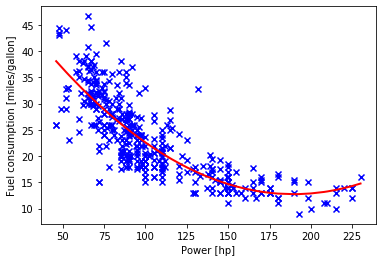

In [24]:
import matplotlib.pyplot as plt


mpg = y
hp = np.array(sorted(x))
hpp = poly.fit_transform(hp)
plt.scatter(x, mpg, color='blue', marker='x')
plt.plot(hp, reg.predict(hpp), color='red', lw=2)
plt.xlabel('Power [hp]')
plt.ylabel('Fuel consumption [miles/gallon]')
plt.show()